In [122]:
import sklearn

In [123]:
import numpy as np

In [124]:
import pandas as pd

In [125]:
money = pd.read_csv("uah_history.csv", sep=';')

In [126]:
past = 7 * 4   #берем дані за останні 4 тижні
future = 7   #і по них вгадуємо на тиждень наперед

In [127]:
salary = [10000, 20000, 30000, 40000, 50000]

In [128]:
values = money['curs']

In [129]:
len(values)

412

In [130]:
start = past
end = len(values) - future
raw_df = []

for i in range(start, end):
    past_and_future_value = values[(i-past):(i+future)]
    raw_df.append(list(past_and_future_value))

In [131]:
past_columns = [f"past_{i}" for i in range(past)]
future_columns = [f"future_{i}" for i in range(future)]

In [132]:
df = pd.DataFrame(raw_df, columns=(past_columns+future_columns))

In [146]:
X = df[past_columns][:-1]
y = df[future_columns][:-1]

In [147]:
X_test = df[past_columns][-1:]
y_test = df[future_columns][-1:]

In [148]:
from sklearn.linear_model import LinearRegression

In [149]:
LinReg = LinearRegression()

In [150]:
LinReg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [151]:
prediction = LinReg.predict(X_test)[0]

In [152]:
import numpy as np

In [153]:
np.linalg.norm(y_test - prediction)

0.9912321434146263

In [155]:
np.array(y_test)
np.array(prediction)

array([26.12086571, 26.04851249, 25.99309254, 25.98522004, 26.06108065,
       26.01139015, 25.96393275])

In [157]:
sklearn.metrics.mean_absolute_error(np.array([list(y_test.iloc[0])]), np.array([prediction]))

0.36330080948197513

In [158]:
import matplotlib.pyplot as plt

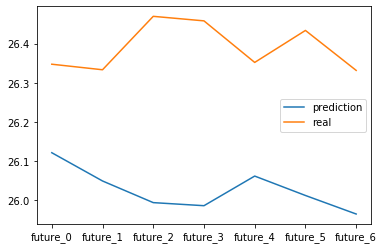

In [159]:
plt.plot(prediction, label='prediction')
plt.plot(y_test.iloc[0], label='real')
plt.legend()

In [160]:
from sklearn.neighbors import KNeighborsRegressor

In [173]:
KNN = KNeighborsRegressor(n_neighbors=2)
KNN.fit(X, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

In [185]:
prediction = KNN.predict(X_test)[0]

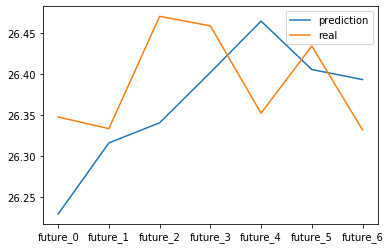

In [186]:
plt.plot(prediction, label='prediction')
plt.plot(y_test.iloc[0], label='real')
plt.legend()

In [187]:
sklearn.metrics.mean_absolute_error(np.array([list(y_test.iloc[0])]), np.array([prediction]))

0.07490714285714313

In [188]:
from sklearn.neural_network import MLPRegressor

In [201]:
MLP = MLPRegressor(max_iter=2000, hidden_layer_sizes=600)

In [202]:
MLP

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=600, learning_rate='constant',
             learning_rate_init=0.001, max_iter=2000, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [203]:
MLP.fit(X, y)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=600, learning_rate='constant',
             learning_rate_init=0.001, max_iter=2000, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [204]:
prediction = MLP.predict(X_test)[0]

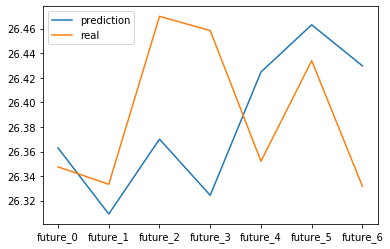

In [205]:
plt.plot(prediction, label='prediction')
plt.plot(y_test.iloc[0], label='real')
plt.legend()

In [206]:
sklearn.metrics.mean_absolute_error(np.array([list(y_test.iloc[0])]), np.array([prediction]))

0.06767611274975291